https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_label.html#sphx-glr-auto-examples-segmentation-plot-label-py

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.color import rgb2gray

from skimage import io

In [23]:
def show_image(img, cmap="gray"):
    fig, ax = plt.subplots(figsize=(32,20))
    ax.imshow(img, cmap)
    return fig, ax

(<Figure size 2304x1440 with 1 Axes>, <AxesSubplot:>)

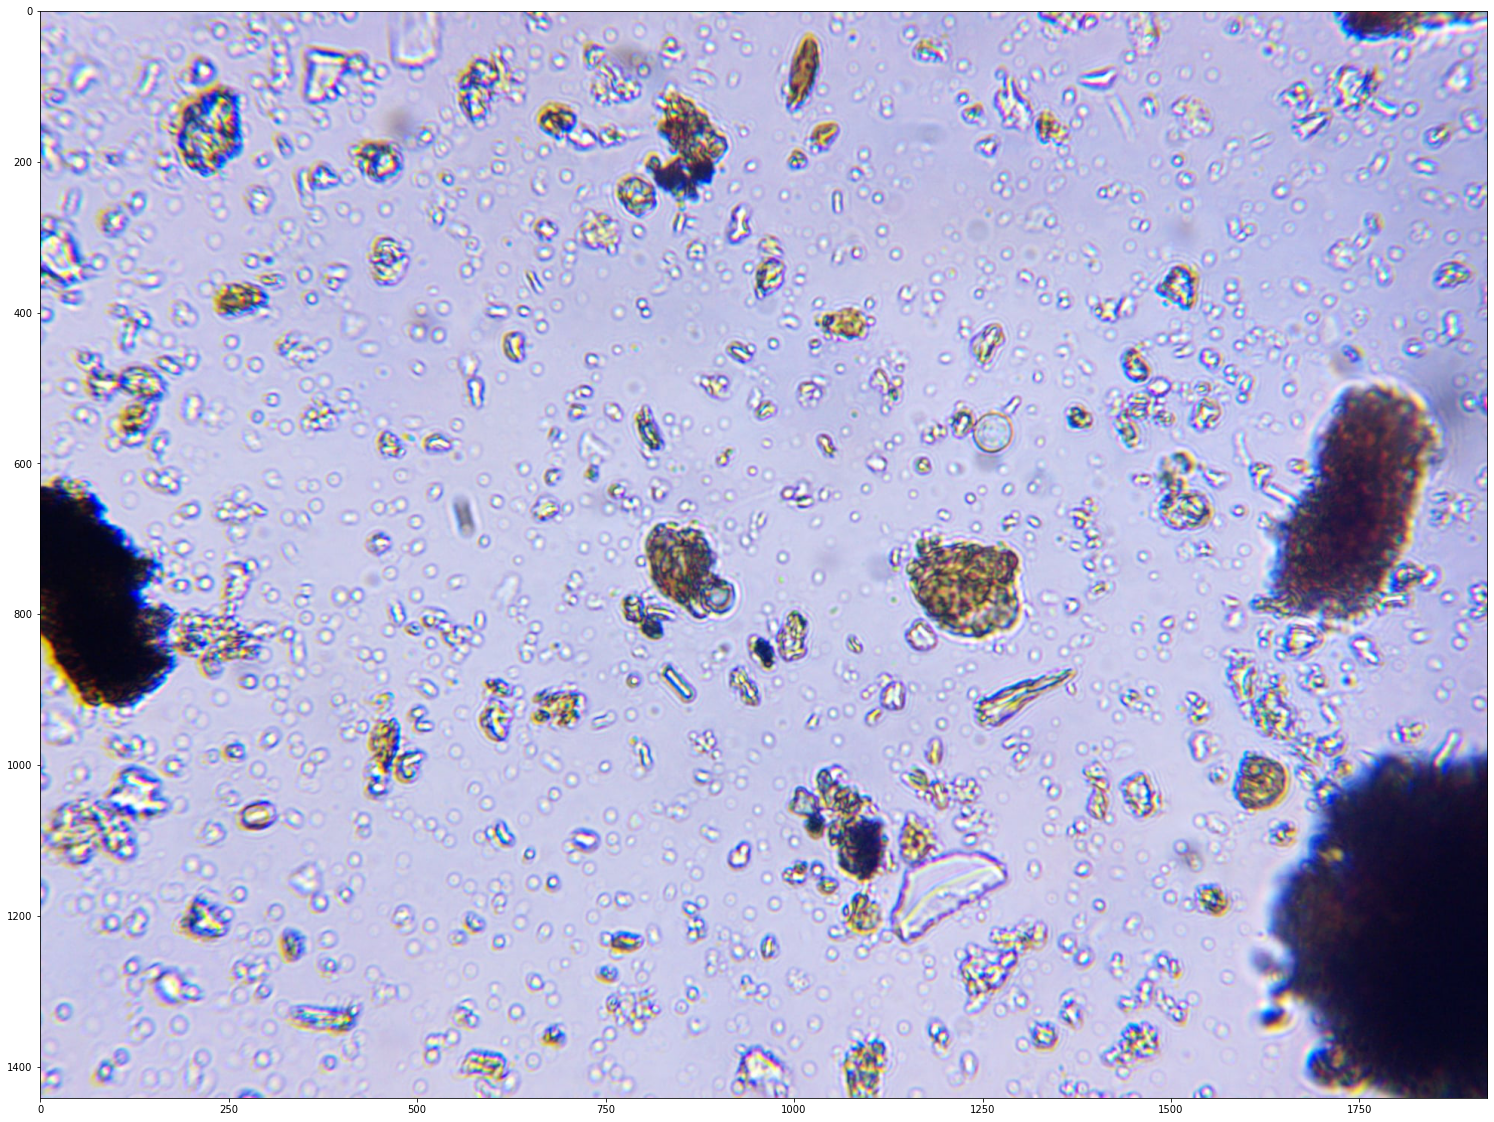

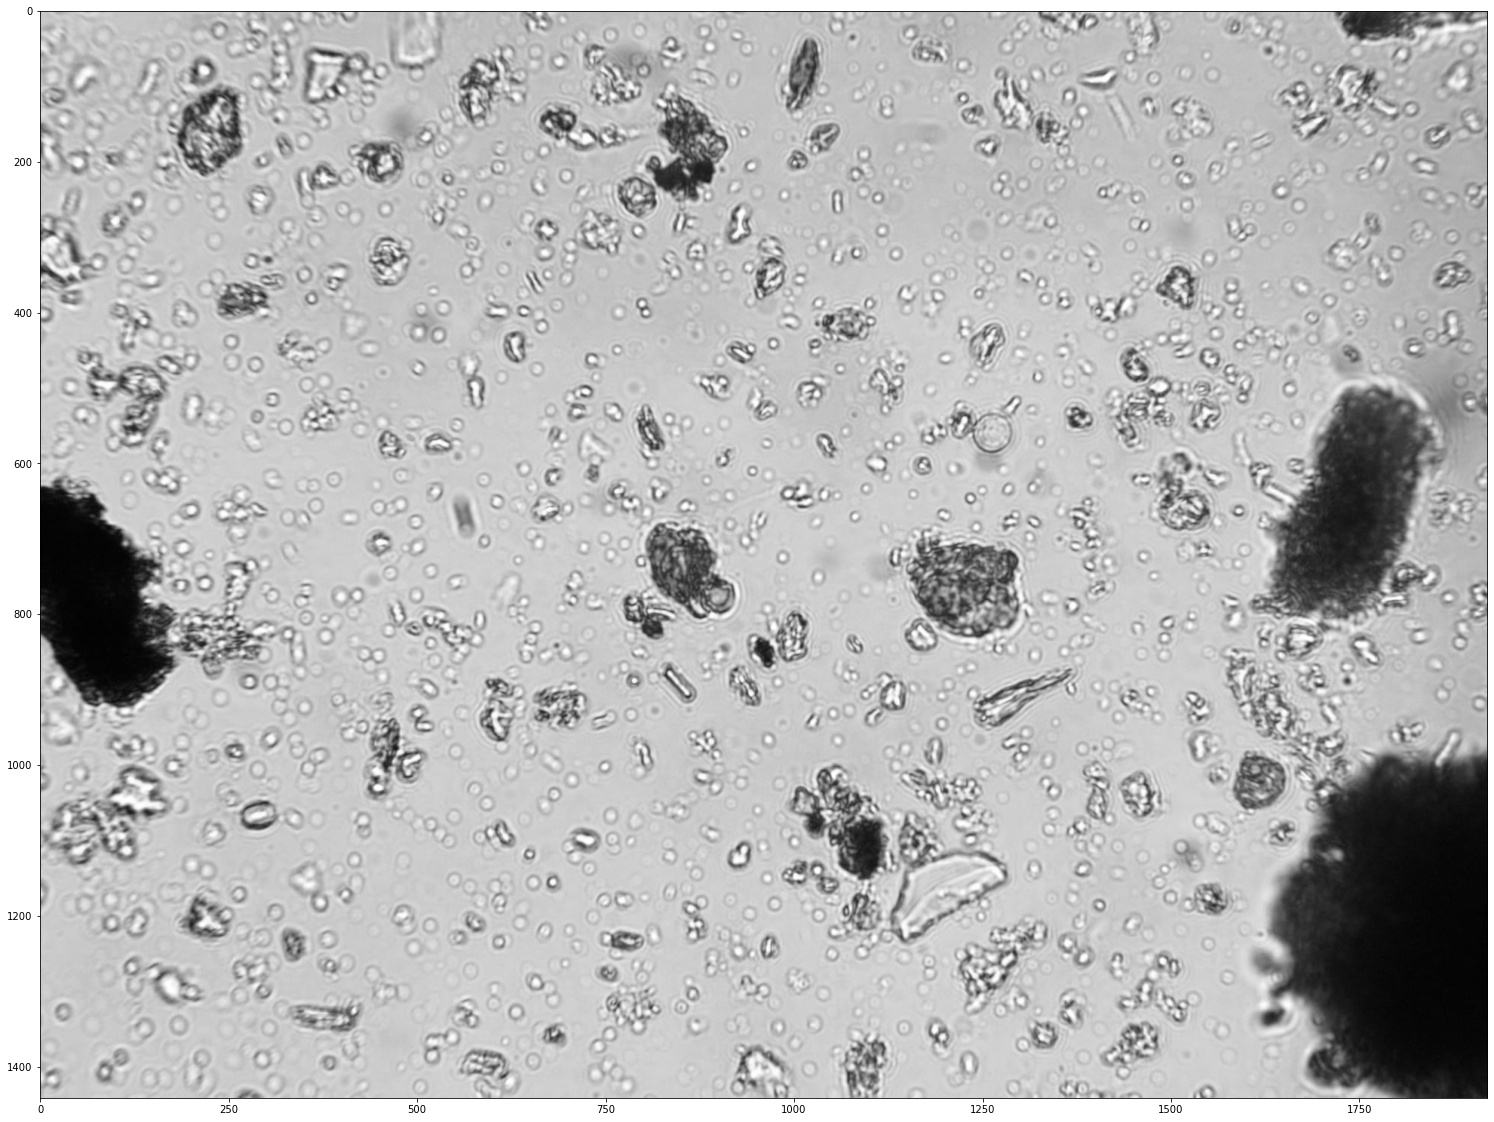

In [24]:
image = io.imread("205220701_10225025437924347_3533751378391124355_n.jpg")
image_gray = rgb2gray(image)
show_image(image)
show_image(image_gray)

(<Figure size 2304x1440 with 1 Axes>, <AxesSubplot:>)

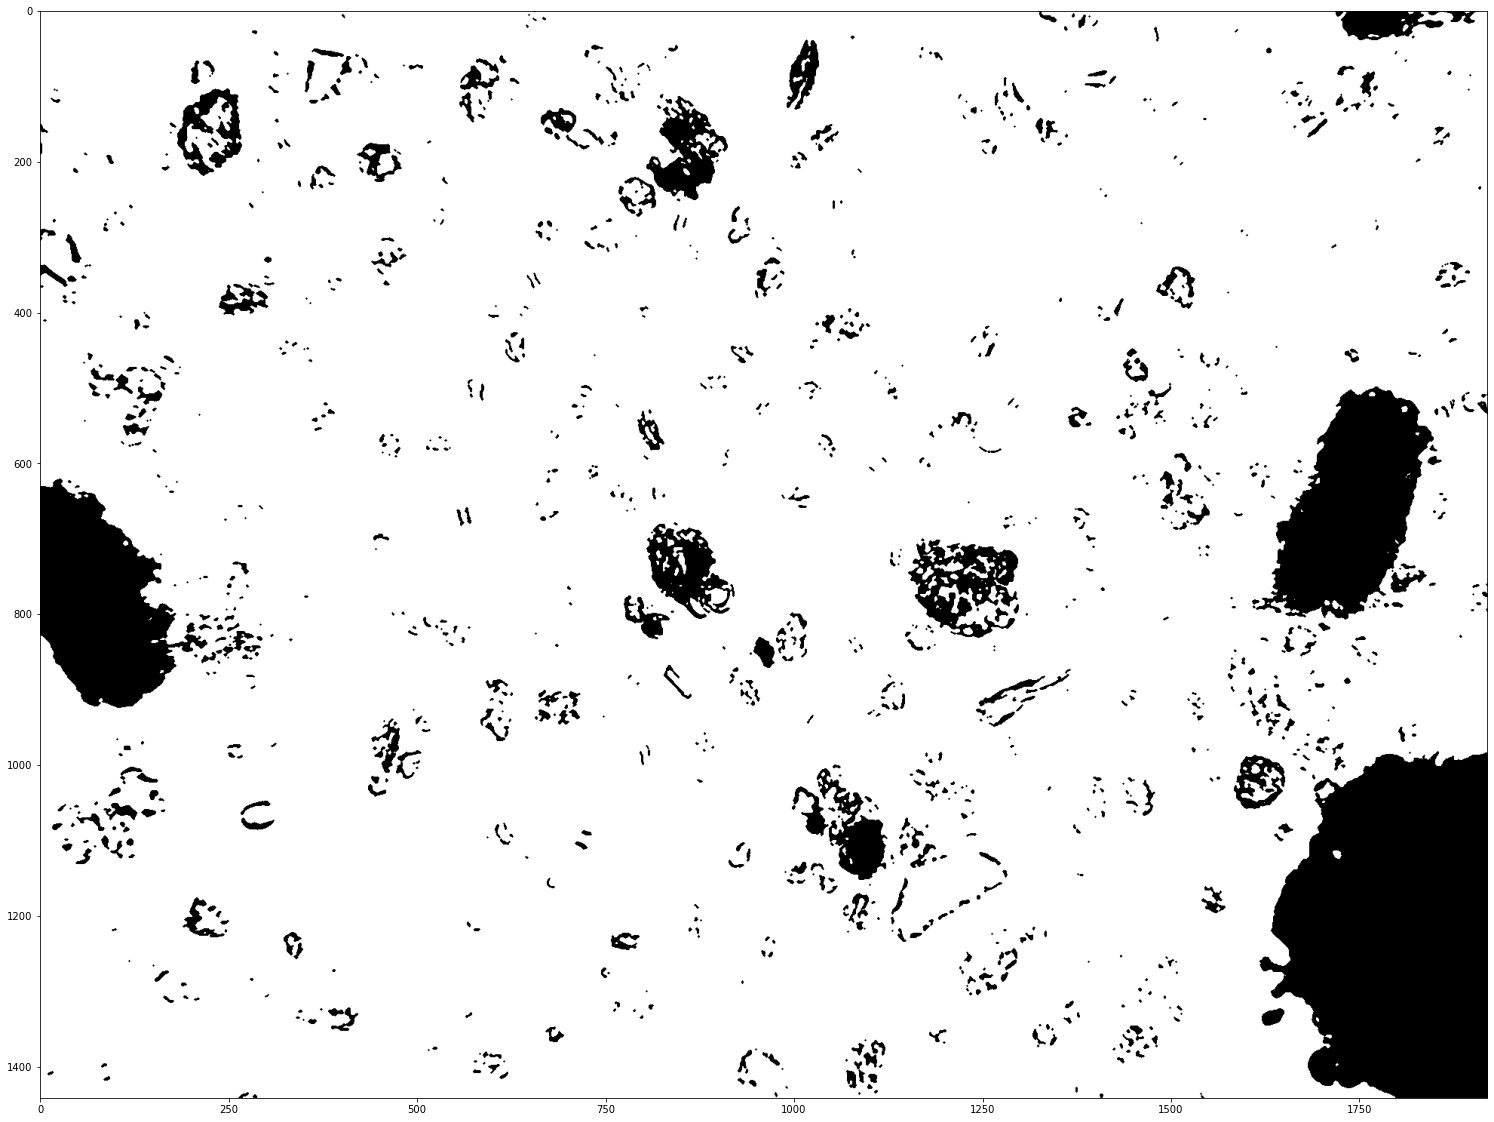

In [32]:
thresh = threshold_otsu(image_gray)
bw = closing(image_gray > thresh)

show_image(bw, cmap='gray')

In [26]:
# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

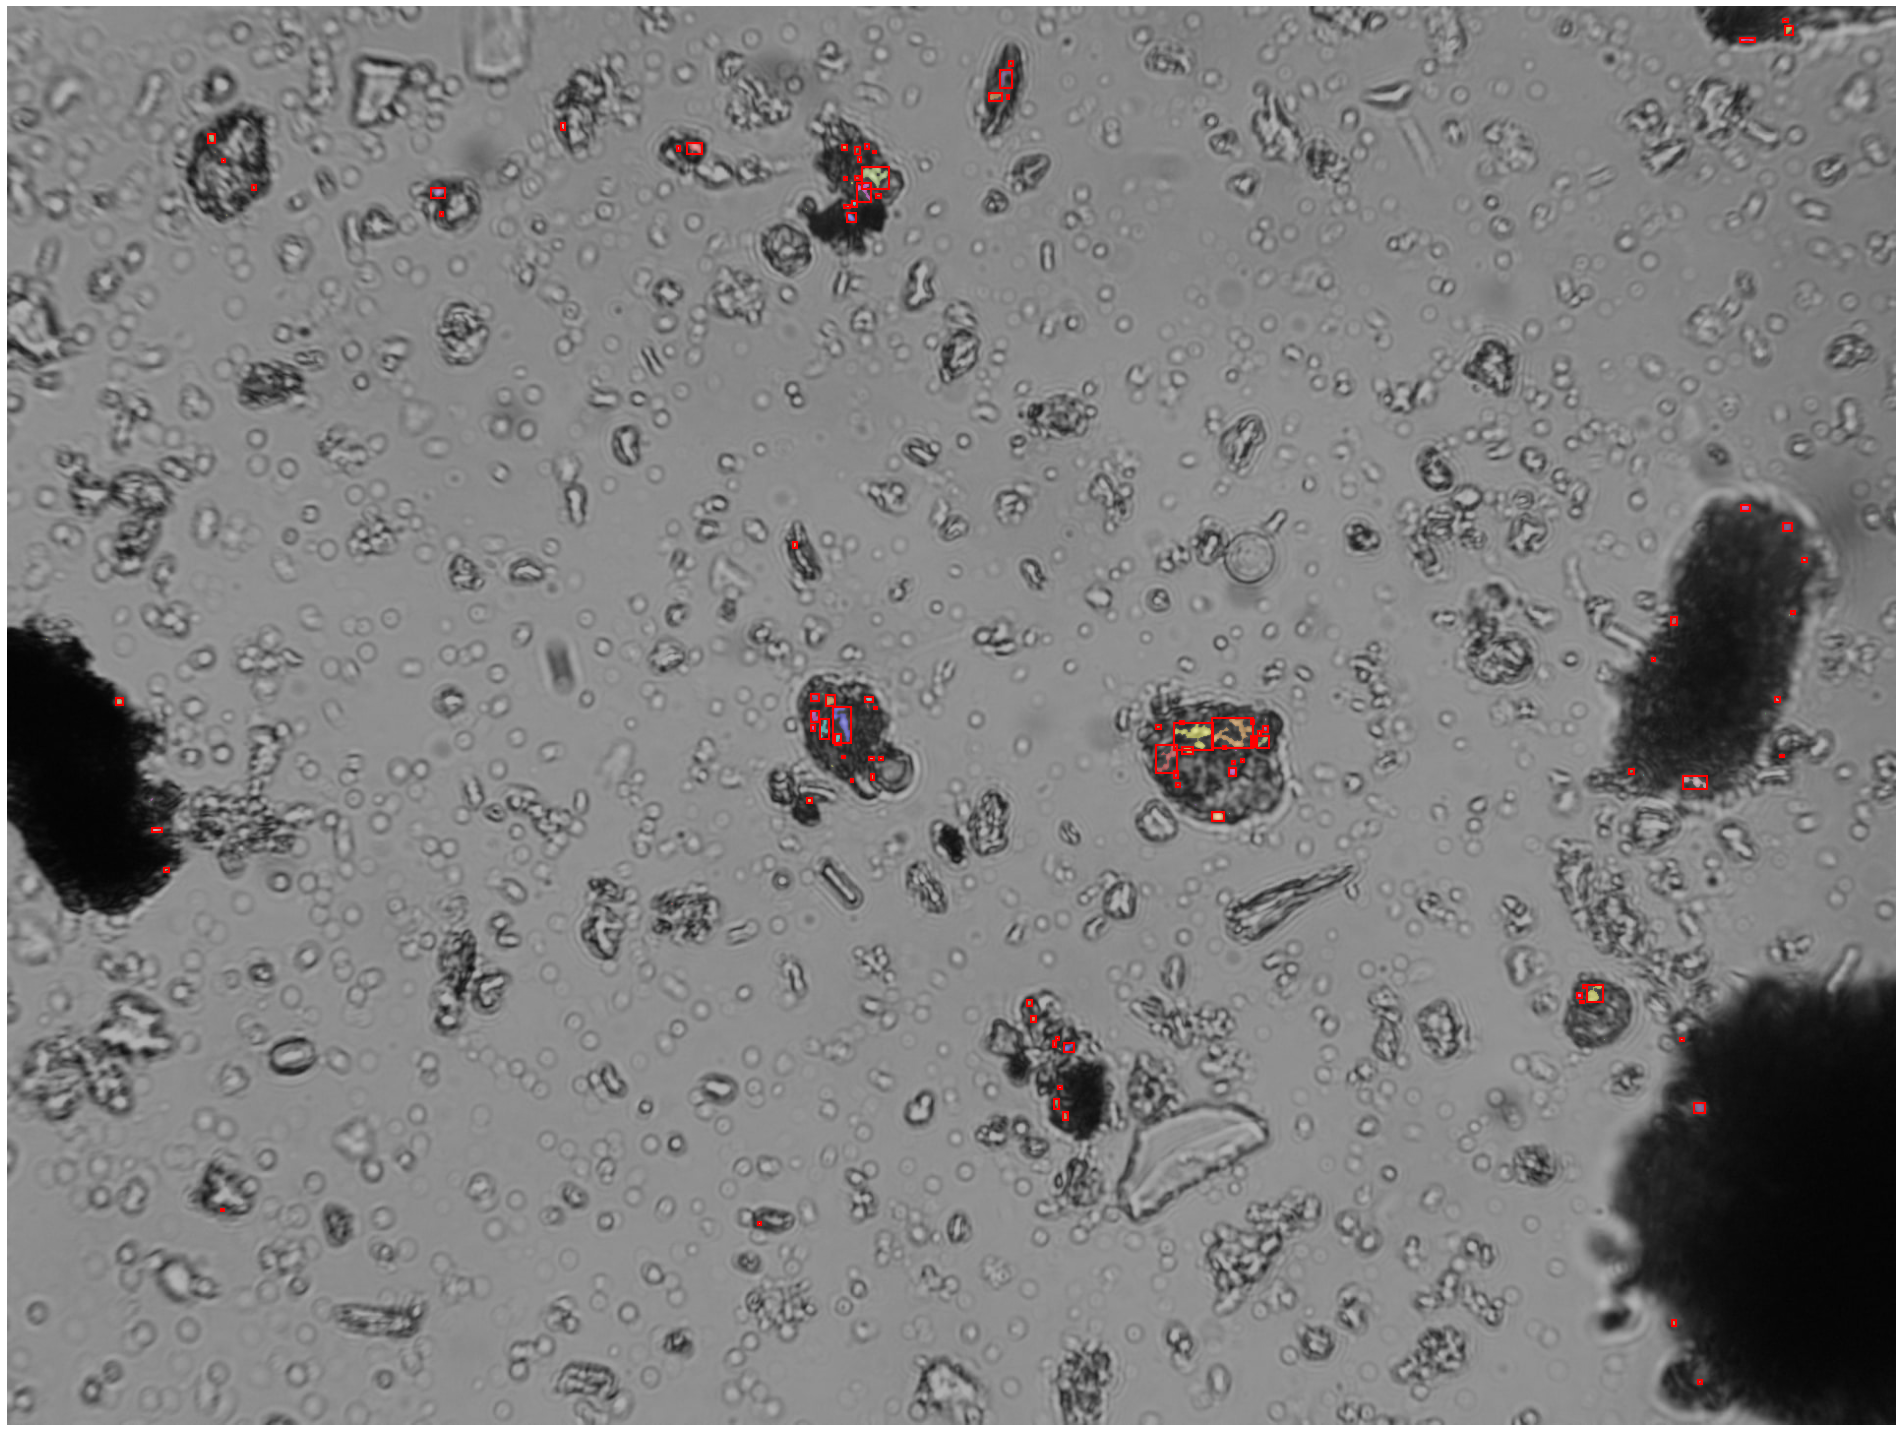

In [27]:
fig, ax = plt.subplots(figsize=(32, 20))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 5:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()